# Patient Time Series Overview

In this notebook, we will explore the patient time series data.
  
We will look at specific patients and their time series data over a day or also over a week to get an idea of the different values given in the dataset over the course of a day.

In [1]:
import os
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_folder = os.path.join('../../../data/interim')
all_data = pd.read_csv(os.path.join(data_folder, 'all_train.csv'), index_col=0)
all_data.index = pd.to_datetime(all_data.index)
all_data['day_of_year'] = all_data.index.day_of_year

In [2]:
def plot(patient_id: str, start_day: int, end_day: int | None = None):
    end_day = start_day if end_day is None else end_day

    patient = all_data[all_data.p_num == patient_id]
    patient_range = patient[(patient.days_since_start >= start_day) & (patient.days_since_start <= end_day)]

    # fill missing values with linear interpolation
    patient_range_bg = patient_range['bg']
    patient_range_bg = patient_range_bg.interpolate(method='linear')

    # normalize the carbs to be between 0 and 1, fill missing values with 0
    patient_range_carbs = patient_range['carbs']
    patient_range_carbs = patient_range_carbs.fillna(0)
    patient_range_carbs = (patient_range_carbs - patient_range_carbs.min()) / (patient_range_carbs.max() - patient_range_carbs.min())

    # normalize the insulin to be between 0 and 1
    patient_range_insulin = patient_range['insulin']
    patient_range_insulin = patient_range_insulin.fillna(0)
    patient_range_insulin = (patient_range_insulin - patient_range_insulin.min()) / (patient_range_insulin.max() - patient_range_insulin.min())

    patient_range_cals = patient_range['cals']
    patient_range_cals = patient_range_cals.interpolate(method='linear')

    patient_range_heart_rate = patient_range['hr']
    patient_range_heart_rate = patient_range_heart_rate.interpolate(method='linear')

    fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(16, 8))
    title = f'Patient {patient_id} from day {start_day} to {end_day}' if end_day != start_day else f'Patient {patient_id} on day {start_day}'
    fig.suptitle(title, fontsize=16, fontweight='bold', verticalalignment='baseline')

    ax1.plot(patient_range_bg.index, patient_range_bg, color='red', linestyle='-', linewidth=1, label='Blood Glucose')
    ax1.set_ylabel('Blood Glucose')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax1.tick_params(axis='x', rotation=45)
    max_bg = np.ceil(np.max(patient_range_bg))
    ax1.set_ylim(bottom=0, top=max_bg)
    ax1.set_yticks(np.arange(0, max_bg, max_bg / 5))

    ax1_2 = ax1.twinx()
    ax1_2.plot(patient_range_carbs.index, patient_range_carbs, color='blue', linestyle='-', linewidth=1, label='Carbs')
    ax1_2.plot(patient_range_insulin.index, patient_range_insulin, color='green', linestyle='-', linewidth=1, markersize=6, label='Insulin')
    ax1_2.set_ylabel('Carbs/Insulin normalized')
    ax1_2.set_ylim(bottom=0, top=1)

    # Add legends for both line and bar plots
    ax1.legend(loc='upper left')
    ax1_2.legend(loc='upper right')

    ax2.plot(patient_range_cals.index, patient_range_cals, color='orange', linestyle='-', linewidth=1, markersize=6, label='Calories')
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax2.set_ylabel('Calories')
    ax2.set_ylim(bottom=0, top=60)
    ax2.set_yticks(np.arange(0, 60, 10))

    ax2_1 = ax2.twinx()
    ax2_1.plot(patient_range.index, patient_range_heart_rate, color='purple', linestyle='-', linewidth=1, markersize=6, label='Heart Rate')
    ax2_1.set_ylabel('Heart Rate')
    ax2_1.set_ylim(bottom=0, top=180)
    ax2_1.set_yticks(np.arange(0, 180, 30))

    ax2.legend(loc='upper left')
    ax2_1.legend(loc='upper right')

    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Patient 1 - Day 21

A typical day for patient 1. We can see the blood glucose levels, the carbs and insulin intake, the calories burned and the heart rate over the course of the day.

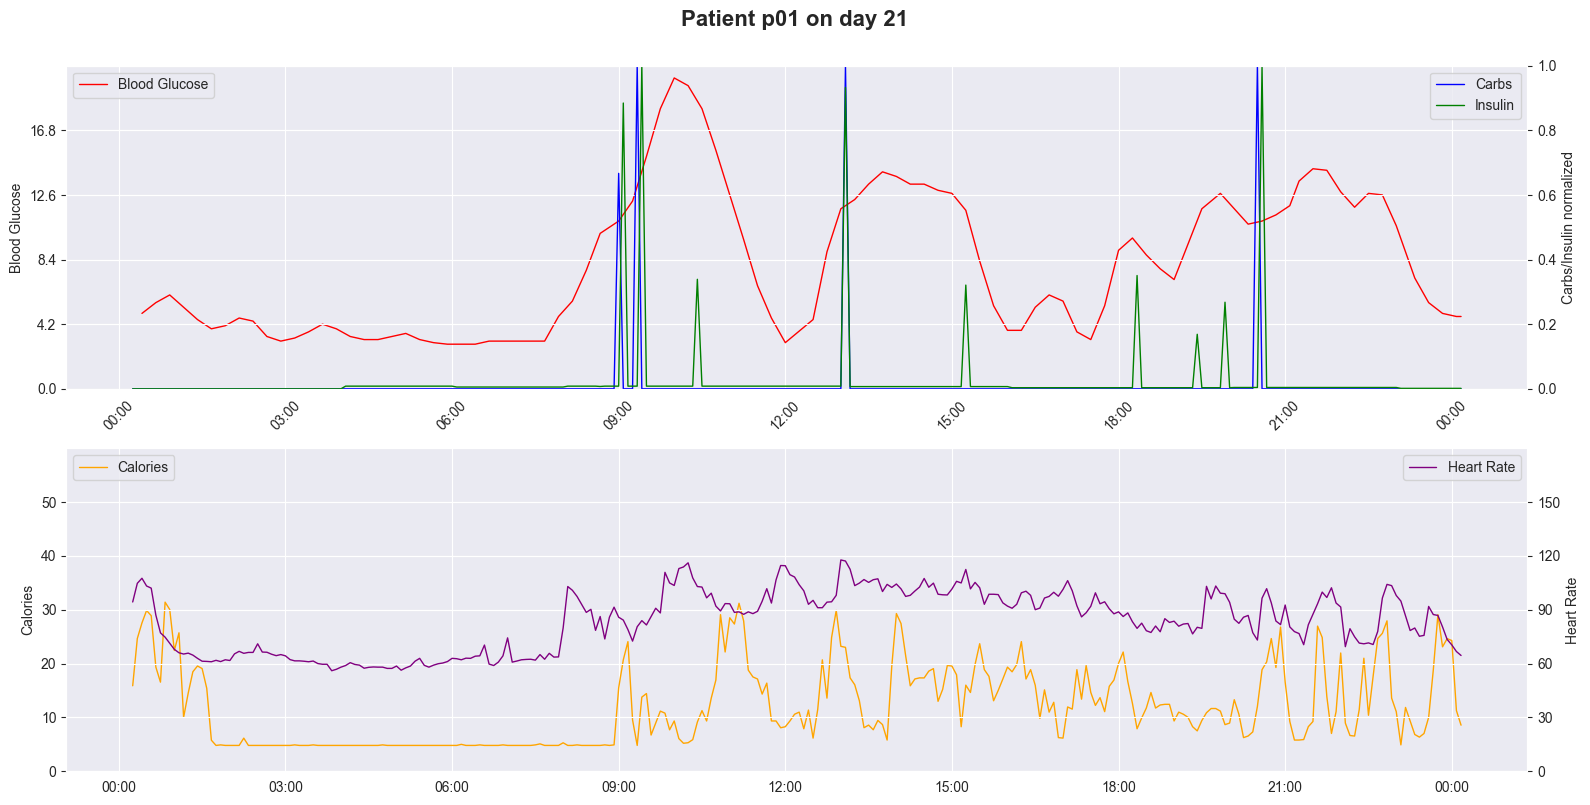

In [3]:
plot('p01', 21)